In [1]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle

In [2]:
### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )

In [3]:
### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
from sklearn.cross_validation import train_test_split

ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

/opt/miniconda3/envs/uda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn.linear_model import LinearRegression
#(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)[source]

reg = LinearRegression(normalize=True)
reg.fit(ages_train, net_worths_train)

print "Slope: ", reg.coef_[0][0]
print "Intercept: ", reg.intercept_[0]
print "Score of train set: ", reg.score(ages_train, net_worths_train)
print "Score of test set: ", reg.score(ages_test, net_worths_test)

pred = reg.predict(ages_test)

from sklearn.metrics import r2_score

r2_score(net_worths_test, pred)

Slope:  5.07793064344
Intercept:  25.2100215456
Score of train set:  0.489872596175
Score of test set:  0.878262470366


/opt/miniconda3/envs/uda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


0.87826247036646721

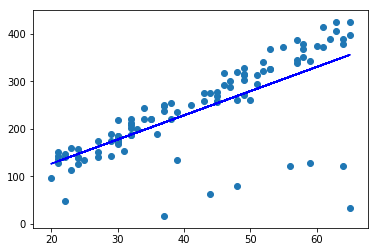

In [5]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

In [44]:
def outlierCleaner(predictions, ages, net_worths, percentage_to_remove=0.1):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []

    ### your code goes here
    n = int(len(net_worths) * percentage_to_remove)
    # abs() !!!
    errors = abs(net_worths - predictions)
    
    # one way to do it
    cleaned_data = zip(ages, net_worths, errors)
    cleaned_data = sorted(cleaned_data, key=lambda x: x[2], reverse=True)
    return list(cleaned_data[n:])
    
    #     another way    
    biggest_errors_indexes = np.argsort(errors, axis=0)[::-1].flatten()[:n]
    # alternative:
    # biggest_errors_indexes = -np.argsort(error, axis=0)[n:]
    
    # non-intersection
    not_biggest_error_indexes = np.setxor1d(np.arange(len(net_worths)), biggest_errors_indexes)
    
    return tuple(
        [
            (
                ages[x], \
                net_worths[x], \
                errors[x]
            ) for x in not_biggest_error_indexes
        ]
        
    )

In [47]:
### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train, 0.1 )
    
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"
    
print "Before: ", len(predictions)
print "After: ", len(cleaned_data)

Before:  90
After:  81


Slope:  6.36859480694
Intercept:  -6.9186106873
Score of train set:  0.409325454478
Score of test set:  0.983189455396


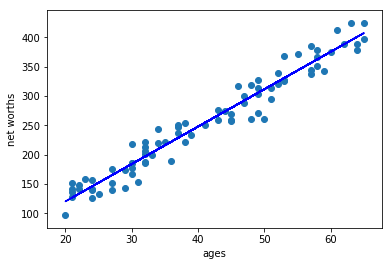

In [48]:
### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        
        print "Slope: ", reg.coef_[0][0]
        print "Intercept: ", reg.intercept_[0]
        print "Score of train set: ", reg.score(ages_train, net_worths_train)
        print "Score of test set: ", reg.score(ages_test, net_worths_test)    
        
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"